Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2998, 16)          64        
                                                                 
 dropout (Dropout)           (None, 2998, 16)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2996, 32)          1568      
                                                                 
 dropout_1 (Dropout)         (None, 2996, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1498, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 47936)             0         
                                                        

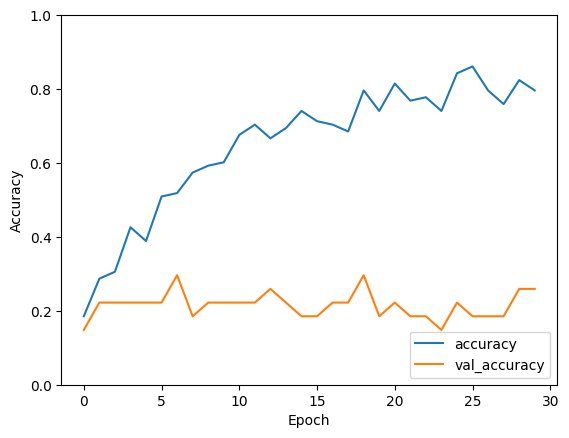

In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.regularizers import l2
import matplotlib.pyplot as plt


AUDIO_DIR = "/audio"
CLASSES = ["breathing", "drinking", "laughing", "sneezing", "snoring", "coughing"]
SAMPLE_RATE = 1000
DURATION = 3  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def load_audio_files(samples_per_track):
    data = []
    labels = []
    for c in CLASSES:
        class_dir = os.path.join(AUDIO_DIR, c)
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            try:
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                signal = signal[:samples_per_track]
                signal = np.pad(signal, (0, samples_per_track - len(signal)), "constant")
                data.append(signal)
                labels.append(CLASSES.index(c))
            except Exception as e:
                print(f"Error loading file {file_path}: {str(e)}")
    return np.array(data), np.array(labels)

data, labels = load_audio_files(SAMPLES_PER_TRACK)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(SAMPLES_PER_TRACK, 1)))
model.add(Dropout(0.25))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(len(CLASSES), activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model.summary()

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Epoch 1/30
2/2 [==============================] - 1s 234ms/step - loss: 20.0539 - accuracy: 0.1759 - val_loss: 6.0449 - val_accuracy: 0.1852
Epoch 2/30
2/2 [==============================] - 0s 56ms/step - loss: 15.1178 - accuracy: 0.1759 - val_loss: 4.8580 - val_accuracy: 0.1481
Epoch 3/30
2/2 [==============================] - 0s 57ms/step - loss: 11.1321 - accuracy: 0.2037 - val_loss: 2.5806 - val_accuracy: 0.1852
Epoch 4/30
2/2 [==============================] - 0s 56ms/step - loss: 9.1609 - accuracy: 0.2037 - val_loss: 1.8469 - val_accuracy: 0.2593
Epoch 5/30
2/2 [==============================] - 0s 56ms/step - loss: 6.0948 - accuracy: 0.2870 - val_loss: 1.7772 - val_accuracy: 0.2593
Epoch 6/30
2/2 [==============================] - 0s 56ms/step - loss: 4.7449 - accuracy: 0.2778 - val_loss: 1.7799 - val_accuracy: 0.2963
Epoch 7/30
2/2 [==============================] - 0s 57ms/step - loss: 5.2978 - accuracy: 0.2963 - val_loss: 1.7011 - val_accuracy: 0.3333
Epoch 8/30
2/2 [=======

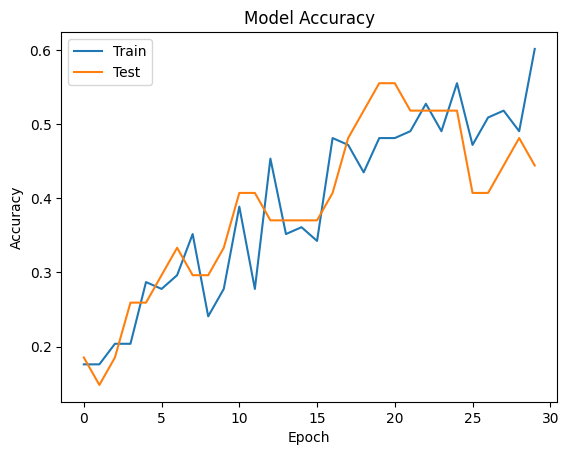

In [27]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
SAMPLE_RATE = 1000
# Define the audio folder paths and labels
audio_folders = ['/audio/breathing', '/audio/drinking', '/audio/laughing', '/audio/sneezing', '/audio/snoring', '/audio/coughing']
labels = ['breathing', 'drinking', 'laughing', 'sneezing', 'snoring', 'coughing']

# Load audio data and labels
data = []
label = []
for i, folder in enumerate(audio_folders):
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            audio, sr = librosa.load(filepath, sr=SAMPLE_RATE)
            #audio, sr = librosa.load(filepath, res_type='kaiser_fast')
            mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
            data.append(mfccs)
            label.append(i)
        except:
              print(f"Error loading file : {str(filename)}")


# Convert data and labels to numpy arrays
data = np.array(data)
label = np.array(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

# Reshape the data to fit the CNN input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Convert the labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(labels), activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', acc)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()